# Value Iteration & Policy Iteration

On va utiliser l'exemple du monde grille simple. 

![Grid World](https://www.lamsade.dauphine.fr/~airiau/Teaching/M2-IASDapp-RL/gridworld.png)



On va numéroter les états comme suit:

| 7 | 8 | 9 | 10 |
|---|---|----|---|
| **4** |  - | **5** | **6**  |
| **0** | **1** | **2** | **3**  |

Les états finaux sont donc les états 6 et 10.

On a 4 actions disponibles, on les encode de la façon suivante:
* $\uparrow$: 0 
* $\leftarrow$ : 1
* $\downarrow$: 2
* $\rightarrow$ : 3

Ci-dessous, on a entré pour vous la matrice de transition $T$ et la matrice de récompense $R$. Ainsi $T[s_1,a,s_2]$ donne la probabilité d'atteindre l'état $s_2$ en ayant pris l'action $a$ dans l'état $s_1$ et $R[s,a]$ donne la récompense immédiate reçue après avoir pris l'action $a$ dans l'état $s$.

Vous pouvez facilement changer la pénalité pour avancer d'une case en changeant la valeur de la variable `penalty` ci-dessous.

Ce n'est peut-être pas la manière la plus élégante, mais cela suffira pour l'exercice!



In [2]:
import numpy as np
import matplotlib.pyplot as plt


l=0.8
s = 0.1
v_win = 1
v_lose = -1

T = np.zeros((11, 4, 11))
#UP
T[0,0,:]=[s, s, 0, 0, l, 0, 0, 0, 0, 0, 0 ] 
T[1,0,:]=[s, l, s, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[2,0,:]=[0, s, 0, s, 0, l, 0, 0, 0, 0, 0 ]
T[3,0,:]=[0, 0, s, s, 0, 0, l, 0, 0, 0, 0 ]
T[4,0,:]=[0, 0, 0, 0, 2*s, 0, 0, l, 0, 0, 0 ]
T[5,0,:]=[0, 0, 0, 0, 0, s, s, 0, 0, l, 0 ]
T[6,0,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[7,0,:]=[0, 0, 0, 0, 0, 0, 0, s+l, s, 0, 0 ]
T[8,0,:]=[0, 0, 0, 0, 0, 0, 0, s, l, s, 0 ]
T[9,0,:]=[0, 0, 0, 0, 0, 0, 0, 0, s, l, s ]
T[10,0,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0 ]
#LEFT
T[0,1,:]=[s+l, 0, 0, 0, s, 0, 0, 0, 0, 0, 0 ] 
T[1,1,:]=[l, 2*s, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[2,1,:]=[0, l, s, 0, 0, s, 0, 0, 0, 0, 0 ]
T[3,1,:]=[0, 0, l, s, 0, 0, s, 0, 0, 0, 0 ]
T[4,1,:]=[s, 0, 0, 0, l, 0, 0, s, 0, 0, 0 ]
T[5,1,:]=[0, 0, s, 0, 0, l, 0, 0, 0, s, 0 ]
T[6,1,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[7,1,:]=[0, 0, 0, 0, s, 0, 0, s+l, 0, 0, 0 ]
T[8,1,:]=[0, 0, 0, 0, 0, 0, 0, l, 2*s, 0, 0 ]
T[9,1,:]=[0, 0, 0, 0, 0, s, 0, 0, l, s, 0 ]
T[10,1,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0 ]
# DOWN
T[0,2,:]=[s+l, s, 0, 0, 0, 0, 0, 0, 0, 0, 0 ] 
T[1,2,:]=[s, l, s, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[2,2,:]=[0, s, l, s, 0, 0, 0, 0, 0, 0, 0 ]
T[3,2,:]=[0, 0, s, l+s, 0, 0, 0, 0, 0, 0, 0 ]
T[4,2,:]=[l, 0, 0, 0, 2*s, 0, 0, 0, 0, 0, 0 ]
T[5,2,:]=[0, 0, l, 0, 0, s, s, 0, 0, 0, 0 ]
T[6,2,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[7,2,:]=[0, 0, 0, 0, l, 0, 0, s, s, 0, 0 ]
T[8,2,:]=[0, 0, 0, 0, 0, 0, 0, s, l, s, 0 ]
T[9,2,:]=[0, 0, 0, 0, 0, 0, 0, 0, s, l, s ]
T[10,2,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0 ]
#RIGHT
T[0,3,:]=[s, l, 0, 0, s, 0, 0, 0, 0, 0, 0 ] 
T[1,3,:]=[0, 2*s, l, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[2,3,:]=[0, 0, s, l, 0, s, 0, 0, 0, 0, 0 ]
T[3,3,:]=[0, 0, 0, s+l, 0, 0, s, 0, 0, 0, 0 ]
T[4,3,:]=[s, 0, 0, 0, l, 0, 0, s, 0, 0, 0 ]
T[5,3,:]=[0, 0, s, 0, 0, 0, l, 0, 0, s, 0 ]
T[6,3,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[7,3,:]=[0, 0, 0, 0, s, 0, 0, s, l, 0, 0 ]
T[8,3,:]=[0, 0, 0, 0, 0, 0, 0, 0, 2*s, l, 0 ]
T[9,3,:]=[0, 0, 0, 0, 0, s, 0, 0, 0, s, l ]
T[10,3,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0 ]

penalty= 0.00;
R = penalty*np.ones((11,4))
R[10,:]= np.ones(4)*v_win
R[6,:]= np.ones(4)*v_lose


In [3]:
def printV(v):
  print('| {:03.2f} | {:03.2f} | {:03.2f} | {:03.2f} |'.format(v[7], v[8], v[9], v[10]))
  print('| {:03.2f} | ---- | {:03.2f} | {:03.1f} |'.format(v[4], v[5], v[6]))
  print('| {:03.2f} | {:03.2f} | {:03.2f} | {:03.2f} |'.format(v[0], v[1], v[2], v[3]))
  

In [4]:
# plot the best policy given the value function v:
# i.e. plot the best action for each state given the value function v.

def plotBestPolicy(v, gamma):
  bestV=np.zeros(11)
  bestA=np.zeros(11)
  fig, ax = plt.subplots()
  # policy extraction
  for s1 in range(11):
    val=[]
    for a in range(4):
      va=0
      for s2 in range(11):
        va += T[s1,a,s2]*v[s2]
      val= val+[ R[s1,a]+gamma*va ]
    bestV[s1]=np.max(val)
    bestA[s1]=np.argmax(val)

    matV= np.array( [[bestV[7], bestV[8], bestV[9], bestV[10]],
                    [bestV[4],   -1 , bestV[5], bestV[6]],
                    [bestV[0], bestV[1], bestV[2], bestV[3]]]
                    )
    matA = np.array([
                    [bestA[7], bestA[8], bestA[9], -1],
                    [bestA[4],   -1 , bestA[5], -1],
                    [bestA[0], bestA[1], bestA[2], bestA[3]]])

    im = ax.imshow(matV)


  for i in range(matV.shape[0]):
      for j in range(matV.shape[1]):
          if matA[i][j]==-1:
              arrow = ''
          elif matA[i, j] == 0:
              arrow = '^'
          elif matA[i, j] == 1:
              arrow = '<'
          elif matA[i, j] == 2:
              arrow = 'v'
          elif matA[i, j] == 3:
              arrow = '>'
          text = ax.text(j, i, arrow, ha = "center", va = "center",
                         color = "black")
            
  cbar = ax.figure.colorbar(im, ax = ax)
    
  fig.tight_layout()
  plt.show() 

## Value Iteration
Implémentez l'algorithme d'itération sur les valeurs. Pour ce faire, implémentez une fonction qui prend en paramètre:
* $\epsilon$ le paramètre pour le test d'arrêt (dans un premier temps, vous pouvez remplacer ce paramètre par un nombre d'itération maximal, comme dans l'appel ci-dessou)
* $\gamma$ le taux d'escompte (i.e. un facteur qui dévalue une récomponse obtenue dans le future)
* $T$ la matrice de transition
* $R$ la matrice de récompense

La méthode retourne le vecteur $v: S \rightarrow {\mathbb R}$ qui associe à chaque état la valeur optimale de cet état.

La fonction $printV$ ci-dessous affichera les valeurs de $v$ pour le problème du gridworld.

Vous pourrez ainsi tester si vous retrouvez les valeurs de l'exemple montré en cours. 

In [71]:
##########Value Iteration##########

def valueIteration(epsilon, gamma, T = T, R = R, max_iter = 10000, log = True):
    
    #Initialization
    
    cardS = R.shape[0] # Number of possible states
    vn1 = np.zeros(cardS) #Vector of weighted returns
    
    #Main 
    for n in range(max_iter) :
        
        vn = vn1 #save
        vn1 = np.max (R + gamma * np.sum(T * vn, axis = 2), axis = 1)
        #max_A [(S, A) + sum_S( (S,A,S)*(S,.))] ok
        
        delta = np.abs(vn - vn1)#stopping condition
        
        if (delta < epsilon).all() :
            if log : print("The algorithm has converged with ", n, " iterations")
            return vn1
                           
    if log : print("The algorithm has failed to converge")
    return vn1
    

In [73]:
w = valueIteration(1e-16, 0.9, T, R)
printV(w)

The algorithm has converged with  51  iterations
| 0.64 | 0.74 | 0.85 | 1.00 |
| 0.57 | ---- | 0.57 | -1.0 |
| 0.49 | 0.43 | 0.48 | 0.28 |


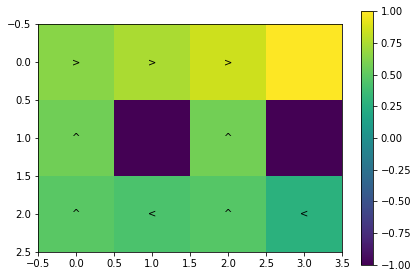

In [ ]:
plotBestPolicy(w, 0.9)

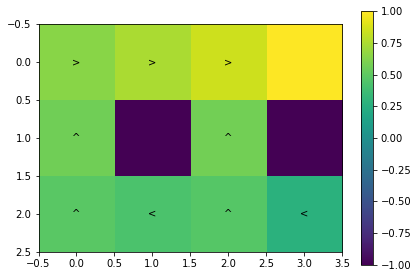

In [75]:
plotBestPolicy(w, 0.9)

Vous pouvez modifier la matrice de récompense pour observer les différentes politiques optimales vues en cours. Peut-être en avons nous oublié?


## Policy Iteration

Implémentez l'algorithme d'itération sur les politiques. Pour débuger, vous pouvez regarder dessiner la politique avec les fonctions ci-dessus (pour voir la fonction de valeur et/ou la politique associée).


↑
: 0
←
: 1
↓
: 2
→
: 3

In [107]:
pi0_s = np.zeros((11, 4)) #11 states 4 actions

pi0_s[0, :] = [0, 0, 0, 1] #in 0 we go right
pi0_s[1, :] = [0, 0, 0, 1] #in 1 we go right
pi0_s[2, :] = [1, 0, 0, 0] #in 2 we go up
pi0_s[3, :] = [0, 1, 0, 0] #in 3 we go left
pi0_s[4, :] = [0, 0, 1, 0] #in 4 we go down
pi0_s[5, :] = [1, 0, 0, 0] #in 5 we go up
pi0_s[6, :] = [0, 0, 1, 0] #in 6 we go down
pi0_s[7, :] = [0, 0, 0, 1] #in 7 we go right
pi0_s[8, :] = [0, 0, 0, 1] #in 8 we go right
pi0_s[9, :] = [0, 0, 1, 0] #in 10 we go down
pi0_s[10, :] = [0, 0, 0, 1] #in 11 we go right

pi0 = np.array([3,3,0,1,2,0,2,3,3,2,3], dtype = 'i')

In [61]:
#test
cardS = 11
T2 = np.zeros((cardS, cardS))
for s in range(cardS) :
    T2[:,s] = np.sum(pi0_s * T[:,:,s], axis = 1)
T2

array([[0.1, 0.8, 0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.2, 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.1, 0. , 0.1, 0. , 0.8, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.8, 0.1, 0. , 0. , 0.1, 0. , 0. , 0. , 0. ],
       [0.8, 0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.1, 0.1, 0. , 0. , 0.8, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0.1, 0.8, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0.8, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.8, 0.1],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]])

In [64]:
np.sum(pi0_s * R, axis = 1)

array([ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  1.])

In [108]:
def compute_Tpi(pi_s, T):
    cardS = T.shape[0]
    T2 = np.zeros((cardS, cardS))
    for s in range(cardS) : T2[:,s] = np.sum(pi0_s * T[:,:,s], axis = 1)
    return T2

def compute_Rpi(pi_s, R): return np.sum(pi_s * R, axis = 1)

def compute_vpi(pi_s, T, R, gamma) :
    Tpi = compute_Tpi(pi_s, T)
    #print(Tpi)
    Rpi = compute_Rpi(pi_s, R)
    #print(Rpi)
    return np.dot(np.linalg.inv(np.eye(cardS, cardS) - gamma * Tpi),  Rpi)

def deterministic_to_conditionnal(pi) :
    pi_s = np.zeros((len(pi), 4), dtype = 'i')
    for s in range(len(pi)) :
        pi_s[s, pi[s]] = 1
    return pi_s

def conditionnal_to_deterministic(pi_s):
    pi = np.zeros(len(pi_s), dtype = 'i')
    for s in range(len(pi_s)):
        pi[s] = np.argmax(pi_s[s, :])
    return pi

In [128]:
#######Policy iteration#########

def policy_iteration(epsilon, gamma, pi0, T = T, R = R, max_iter = 1000, log = True, save_vpi = True):
    
    #Initialization
    cardS = R.shape[0] # Number of possible states
    pin1 = pi0 #Vector of optimal policy
    if save_vpi : vn = np.zeros(cardS)
    
    #Main 
    for n in range(max_iter) :
        
        pin = pin1 #save
        pin_s = deterministic_to_conditionnal(pin)
        
        #Poliy evaluation : v(pi) = (I - gamma.T(pi))^(-1).Rpi
        vpi = compute_vpi(pin_s, T, R, gamma)
        if save_vpi : vn = vpi
        #print(vpi)
        
        #Policy update
        pin1 = np.argmax( R + gamma * np.sum(T * vpi, axis = 2), axis = 1 )
        delta = np.abs(pin - pin1)
        
        if (delta < epsilon).all() :
            if log : print("The algorithm has converged with ", n, " iterations")
            if save_vpi : return pin1, vn
            return pin1
                           
    if log : print("The algorithm has failed to converge")
    if save_vpi : return pin1, vn
    return pin1

In [136]:
pi, v = policy_iteration(1e-16, 0.5, pi0)
pi

The algorithm has converged with  1  iterations


array([0, 1, 1, 2, 0, 1, 0, 3, 3, 3, 0], dtype=int64)

In [137]:
printV(v)

| 0.02 | 0.04 | 0.09 | 1.00 |
| -0.00 | ---- | -0.02 | -1.0 |
| -0.00 | -0.00 | -0.01 | -0.06 |


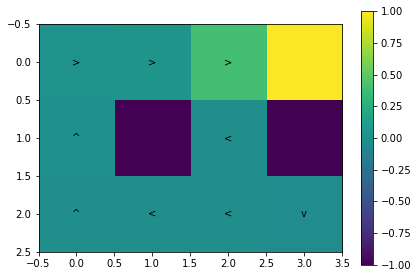

In [138]:
plotBestPolicy(v, 0.5)

In [139]:
pi0 

array([3, 3, 0, 1, 2, 0, 2, 3, 3, 2, 3], dtype=int32)

In [140]:
pi

array([0, 1, 1, 2, 0, 1, 0, 3, 3, 3, 0], dtype=int64)